![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face recognition
Task is to recognize a faces

### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

In [2]:
import tensorflow
tensorflow.__version__

'2.3.0'

#### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [150]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Change current working directory to project folder (2 marks)

In [151]:

project_path = '/content/drive/My Drive/Colab Notebooks/CNN_PROJECT_DATA/'
%cd '/content/drive/My Drive/Colab Notebooks/CNN_PROJECT_DATA/'

/content/drive/My Drive/Colab Notebooks/CNN_PROJECT_DATA


### Extract the zip file (3 marks)
- Extract Aligned Face Dataset from Pinterest.zip

In [152]:

from zipfile import ZipFile

with ZipFile('Aligned Face Dataset from Pinterest.zip', 'r') as z:
  z.extractall()

### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


In [8]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')

### Define function to load image
- Define a function to load image from the metadata

In [9]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

#### Load a sample image (3 marks)
- Load one image using the function "load_image"

Each image in the data set has a same of (301, 299, 3)
The number of features in any image from the data set are: 269997


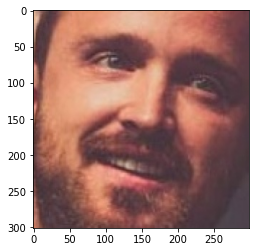

In [10]:
import matplotlib.pyplot as plt

path='/content/PINS/pins_Aaron Paul/Aaron Paul0_262.jpg'
image=load_image(path)
print("Each image in the data set has a same of {0}".format(image.shape))
flattened_img = image.flatten()
print("The number of features in any image from the data set are: {0}".format(flattened_img.shape[0]))
plt.imshow(image)


### VGG Face model
- Here we are giving you the predefined model for VGG face

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Load the model (3 marks)
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [12]:
import h5py

# Open the file as readonly
h5f = h5py.File('/content/drive/My Drive/Colab Notebooks/CNN_PROJECT_DATA/vgg_face_weights.h5', 'r')
h5f.close()

In [13]:

model =vgg_face() 
model.load_weights('/content/drive/My Drive/Colab Notebooks/CNN_PROJECT_DATA/vgg_face_weights.h5')


### Get vgg_face_descriptor

In [14]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

### Generate embeddings for each image in the dataset
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

In [15]:
# Getting embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtaining embedding vector for an image
# Getting the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


PINS/pins_maria pedraza/maria pedraza128_1563.jpg
(268203,)
The number of features in any image from the data set are: 268203
--------------------------------------------
(224, 224, 3)
-------------------------------------------
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
(2622,)


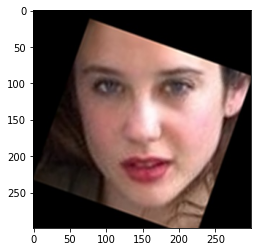

In [16]:
# Getting embedding vector for 1051 image in the metadata using the pre-trained model

img_path = metadata[1051].image_path()
print(img_path)
image1=load_image(img_path)
flattened_img1 = image1.flatten()
print(flattened_img1.shape)
print("The number of features in any image from the data set are: {0}".format(flattened_img1.shape[0]))
plt.imshow(image1)
print('--------------------------------------------')

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img1 = (image1 / 255.).astype(np.float32)

img1 = cv2.resize(img1, dsize = (224,224))
print(img1.shape)
print('-------------------------------------------')

# Obtaing embedding vector for an image
# Getting the embedding vector for the above image using vgg_face_descriptor model and print the shape 
print(np.expand_dims(img1, axis=0))
embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img1, axis=0))[0]
print(embedding_vector.shape)

### Generate embeddings for all images (8 marks)
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [18]:
embeddings = np.zeros((metadata.shape[0], 2622))

for i, m in enumerate(metadata):
  img_path = metadata[i].image_path()
  img = load_image(img_path)

  # Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
  img = (img / 255.).astype(np.float32)

  img = cv2.resize(img, dsize = (224,224))
  print(img.shape)

  # Obtain embedding vector for an image
  # Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

  embeddings[i] = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
  print(embeddings[i].shape)

Streaming output truncated to the last 5000 lines.
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(26

### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [114]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

PINS/pins_emma watson face/emma watson face73.jpg
PINS/pins_emma watson face/emma watson face9.jpg
[0.00551588 0.00098155 0.00669794 ... 0.00102216 0.0059247  0.01159535]

PINS/pins_emma watson face/emma watson face73.jpg
PINS/pins_Robin Taylor/Robin Taylor45.jpg
[0.00551588 0.00098155 0.00669794 ... 0.00102216 0.0059247  0.01159535]

PINS/pins_emma watson face/emma watson face42.jpg
PINS/pins_emma watson face/emma watson face34.jpg
[ 0.0038631  -0.00762915 -0.01060227 ... -0.01588224  0.00733761
  0.00376304]

PINS/pins_emma watson face/emma watson face42.jpg
PINS/pins_emma watson face/emma watson face43.jpg
[ 0.0038631  -0.00762915 -0.01060227 ... -0.01588224  0.00733761
  0.00376304]

PINS/pins_emma watson face/emma watson face49.jpg
PINS/pins_emma watson face/emma watson face151.jpg
[ 0.01076346 -0.00238764 -0.00310175 ... -0.0138076   0.00920464
  0.01094109]

PINS/pins_emma watson face/emma watson face49.jpg
PINS/pins_emma watson face/emma watson face61.jpg
[ 0.01076346 -0.002387

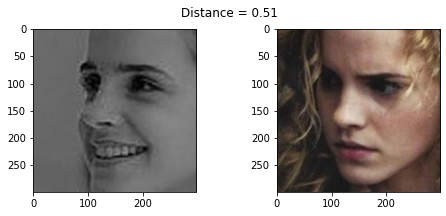

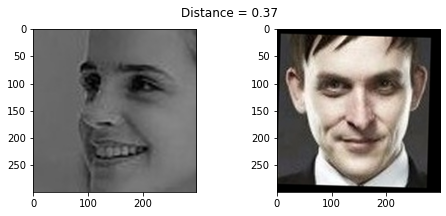

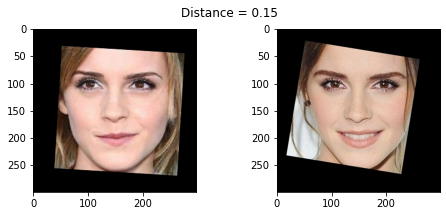

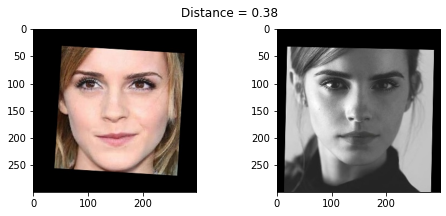

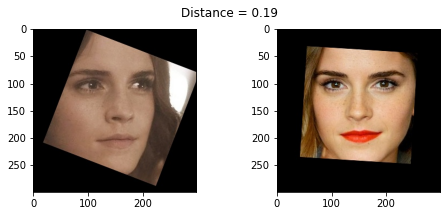

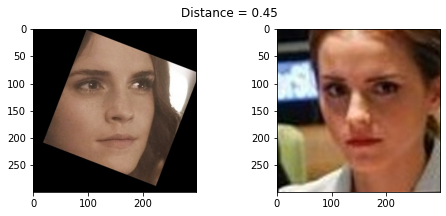

In [115]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));   
    print(metadata[idx1].image_path())
    print(metadata[idx2].image_path())
    print(embeddings[idx1])
    print ( )


show_pair(2, 3)
show_pair(2, 180)

show_pair(30, 31)
show_pair(30, 100)

show_pair(70, 72)
show_pair(70, 115)

### Create train and test sets (8 marks)
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [117]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0     #every 9th example goes in test data and rest go in train data
test_idx = np.arange(metadata.shape[0]) % 9 == 0

# one half as train examples of 10 identities
X_train = embeddings[train_idx]
# another half as test examples of 10 identities

#### Add your code here ####
X_test = embeddings[test_idx]  

targets = np.array([m.name for m in metadata])
#train labels
y_train = targets[train_idx]
#test labels
#### Add your code here ####
y_test = targets[test_idx] 
y_labels=targets

X=embeddings[np.arange(metadata.shape[0])]
X=np.array(X)





In [118]:
print(y_labels.shape)
print (X.shape)

(10770,)
(10770, 2622)


### Encode the Labels (4 marks)
- Encode the targets
- Use LabelEncoder

In [124]:
from sklearn.preprocessing import LabelEncoder


lableEncoder = LabelEncoder()
lableEncoder.fit(y_labels)

print(list(lableEncoder.classes_))

y=lableEncoder.transform(y_labels)
print(y)
print(y.shape)




['pins_Aaron Paul', 'pins_Alvaro Morte', 'pins_Amanda Crew', 'pins_Amaury Nolasco', 'pins_Anna Gunn', 'pins_Benedict Cumberbatch', 'pins_Betsy Brandt', 'pins_Brenton Thwaites', 'pins_Brit Marling', 'pins_Bryan Cranston', 'pins_Caity Lotz', 'pins_Cameron Monaghan', 'pins_Chance Perdomo', 'pins_Chris Evans', 'pins_Chris Pratt', 'pins_Cobie Smulders', 'pins_Danielle Panabaker', 'pins_Dave Franco', 'pins_Dominic Purcell', 'pins_Dwayne Johnson', 'pins_Emilia Clarke', 'pins_Emily Bett Rickards', 'pins_Emma Stone', 'pins_Gwyneth Paltrow', 'pins_Henry Cavil', 'pins_Jason Momoa', 'pins_Jeremy Renner', 'pins_Jesse Eisenberg', 'pins_Jim Parsons', 'pins_Jon Bernthal', 'pins_Josh Radnor', 'pins_Kit Harington', 'pins_Krysten Ritter', 'pins_Kumail Nanjiani', 'pins_Maisie Williams', 'pins_Mark Ruffalo', 'pins_Martin Starr', 'pins_Melissa benoit', 'pins_Mike Colter', 'pins_Morena Baccarin', 'pins_Morgan Freeman', 'pins_Natalie Portman ', 'pins_Neil Patrick Harris', 'pins_Paul Rudd', 'pins_Pedro Alonso'

### Standardize the feature values (4 marks)
- Scale the features using StandardScaler

In [125]:
# Standarize features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
print(scaler.mean_)



[ 0.01083115 -0.0003015   0.00288542 ... -0.01445758  0.00593633
  0.01350416]


In [126]:
X_scale=scaler.transform(X)
X_scale.shape

(10770, 2622)

In [127]:
import pandas as pd

#Dataframe creation
feature_nm=['feature'+str(i) for i in range(X_scale.shape[1])] 
X_scaled_Df=pd.DataFrame(X_scale, columns=feature_nm)


In [128]:
print(X_scaled_Df.tail(5))
print(X_scaled_Df.shape)

       feature0  feature1  feature2  ...  feature2619  feature2620  feature2621
10765  0.307510  2.212214  0.354108  ...    -0.462256     2.328805     1.073542
10766 -0.769841  0.866383  0.676306  ...     0.151362     2.304273     0.793656
10767 -1.882782  1.902833  0.661501  ...     0.087863     0.695843     0.565377
10768 -1.879491  0.936679 -0.677499  ...    -0.091581     2.475440     0.716130
10769 -1.043853  0.464228 -0.261801  ...     0.635891     1.301367     0.056871

[5 rows x 2622 columns]
(10770, 2622)


### Reduce dimensions using PCA (4 marks)
- Reduce feature dimensions using Principal Component Analysis
- Set the parameter n_components=128

In [129]:
from sklearn.decomposition import PCA


pca128 = PCA(n_components=128)
pca128.fit(X_scaled_Df)
print(pca128.components_)
print(pca128.explained_variance_ratio_)
Xpca128 = pca128.transform(X_scaled_Df)

[[-0.02388169  0.00885344 -0.00312211 ... -0.00822362  0.02132787
   0.03887007]
 [ 0.02073244 -0.00100079  0.00845988 ... -0.02319861 -0.00418978
   0.01106285]
 [ 0.0023908   0.00186761 -0.00706644 ...  0.01094912 -0.00089041
  -0.01607352]
 ...
 [ 0.01696419 -0.01562987 -0.01896658 ...  0.01193027 -0.02409398
   0.00132204]
 [-0.01779853  0.01636472  0.01310987 ... -0.0029239  -0.00215507
   0.00230621]
 [-0.0201085   0.00747041  0.02333461 ... -0.0253017  -0.02890344
  -0.02282095]]
[0.13578596 0.0538297  0.0397352  0.03678221 0.03398456 0.03142341
 0.02575682 0.02349445 0.02097759 0.01933877 0.0181939  0.01708215
 0.01657853 0.01563929 0.01424122 0.01365986 0.01308117 0.01222256
 0.01151444 0.01137169 0.01093339 0.0105759  0.00961126 0.00940025
 0.00908793 0.00882966 0.00837186 0.00766567 0.00761492 0.00734083
 0.00698957 0.00662849 0.00631611 0.00624185 0.00567873 0.00537243
 0.00529246 0.0051479  0.00503027 0.00486402 0.00442706 0.00432142
 0.00397452 0.00392458 0.0037013  0.003

In [130]:
print(Xpca128.shape)

(10770, 128)


In [131]:
#Splitting train and test data 
from sklearn import model_selection

test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = model_selection.train_test_split(Xpca128, y, test_size=test_size, random_state=seed)

In [132]:
print(X_train.shape)
print(X_test.shape)
print('------------')
print(y_train.shape)
print(y_test.shape)

(7539, 128)
(3231, 128)
------------
(7539,)
(3231,)


### Build a Classifier (4 marks)
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [134]:
from sklearn.svm import SVC

# gamma is a measure of influence of a data point. It is inverse of distance of influence. C is complexity of the model
# lower C value creates simple hyper surface while higher C creates complex surface
#### Add your code here ####
clf = SVC(gamma=0.025, C=3)    


In [135]:
clf.fit(X_train , y_train)

SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.025, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [136]:
y_pred = clf.predict(X_test)
y_pred
clf.score(X_test, y_test)



0.04054472299597648

### Test results (2 mark)
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

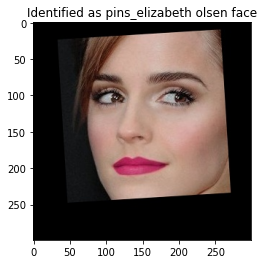

In [147]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10
example_prediction=clf.predict(X_test[example_idx].reshape(1,-1))

example_image = load_image(metadata[test_idx][example_idx].image_path())


example_identity = lableEncoder.inverse_transform(example_prediction)[0]
plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');